<a href="https://colab.research.google.com/github/menna03/Data-Visualization-Project/blob/main/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
BankData = pd.read_csv('/content/BankData_cleaned.csv', low_memory=False)


# 8. After applying preprocessing steps, build a machine learning model (Classification or regression) according to your dataset and the type of the problem.


In [ ]:
BankData.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Total_Months'],
      dtype='object')

In [ ]:
BankData.shape

(69760, 28)

In [ ]:
BankData.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
Total_Months                

In [ ]:
BankData.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Total_Months
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.0,1824.843333,3.0,...,Good,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265.0
1,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.0,1824.843333,3.0,...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268.0
2,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.0,1824.843333,3.0,...,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,271.0
3,0x160e,CUS_0x21b1,January,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.0,3037.986667,2.0,...,Good,605.03,24.464031,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard,319.0
4,0x160f,CUS_0x21b1,February,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.0,3037.986667,2.0,...,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,320.0


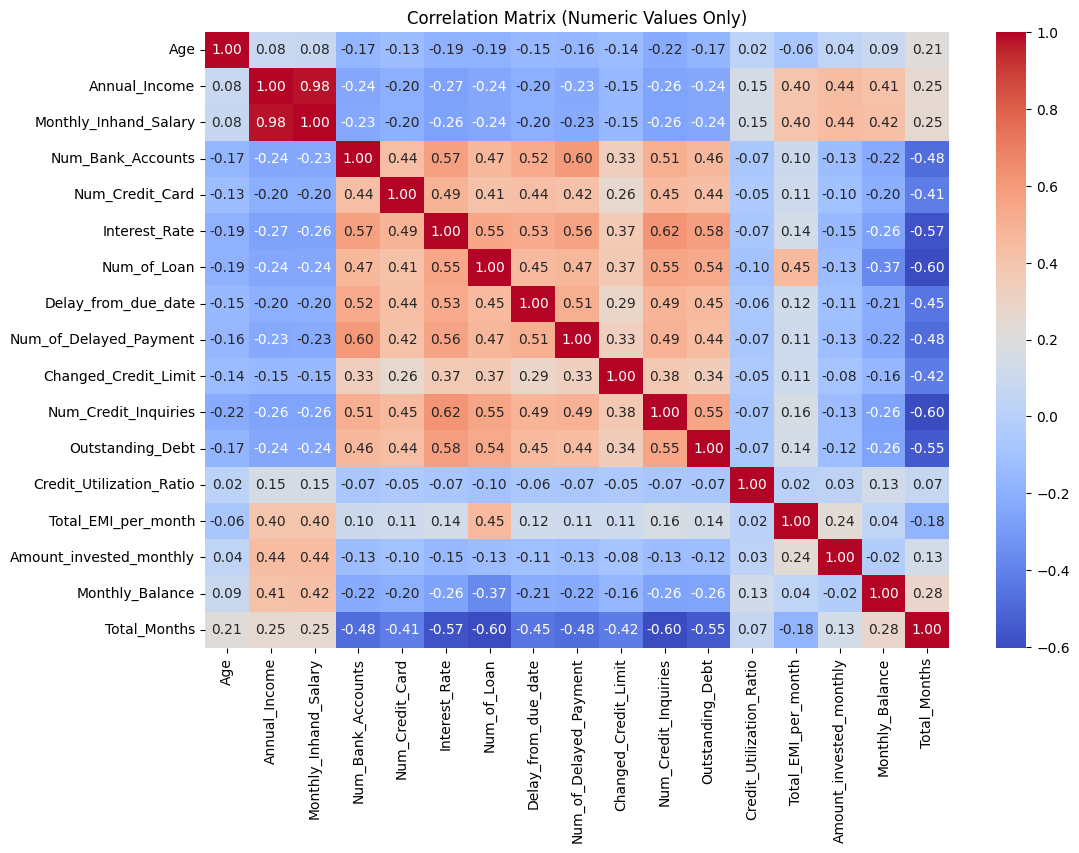

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out numeric columns
numeric_columns = BankData.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for numeric columns only
correlation_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Values Only)')
plt.show()


In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.7 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy the original dataframe to avoid modifying the original data
BankData_encoded = BankData.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = BankData_encoded.select_dtypes(include='object').columns
for column in categorical_columns:
    BankData_encoded[column] = label_encoder.fit_transform(BankData_encoded[column])


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Selecting features and target variable
X = BankData_encoded.drop(columns=["Credit_Score",'ID', 'Customer_ID', 'SSN','Name'])  # Features (all columns except "Credit_Score")
y = BankData_encoded["Credit_Score"]  # Target variable

# Initialize CatBoostClassifier
catboost_clf = CatBoostClassifier()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit CatBoostClassifier on training data
catboost_clf.fit(X_train, y_train)

# Get feature importances
feature_importances = catboost_clf.get_feature_importance()

# Define threshold for feature selection
threshold = 0.01  # You can adjust this threshold as needed

# Get indices of selected features based on feature importances
selected_feature_indices = [i for i, importance in enumerate(feature_importances) if importance > threshold]

# Get selected feature names
selected_features = X_train.columns[selected_feature_indices]

# Add selected features to the DataFrame
BankData_encoded['CatBoost'] = 'Not Selected'  # Initialize all values as 'Not Selected'
BankData_encoded.loc[:, selected_features] = 'Selected'  # Update selected features to 'Selected'

# Print number of selected features
print("Number of selected features:", len(selected_features))

# Display selected features
selected_features


Learning rate set to 0.097141
0:	learn: 1.0306342	total: 277ms	remaining: 4m 36s
1:	learn: 0.9782941	total: 398ms	remaining: 3m 18s
2:	learn: 0.9338758	total: 536ms	remaining: 2m 58s
3:	learn: 0.8995477	total: 669ms	remaining: 2m 46s
4:	learn: 0.8715556	total: 773ms	remaining: 2m 33s
5:	learn: 0.8455398	total: 893ms	remaining: 2m 27s
6:	learn: 0.8239885	total: 971ms	remaining: 2m 17s
7:	learn: 0.8059593	total: 1.13s	remaining: 2m 19s
8:	learn: 0.7911342	total: 1.27s	remaining: 2m 19s
9:	learn: 0.7777375	total: 1.41s	remaining: 2m 19s
10:	learn: 0.7654324	total: 1.53s	remaining: 2m 17s
11:	learn: 0.7552031	total: 1.64s	remaining: 2m 14s
12:	learn: 0.7453261	total: 1.75s	remaining: 2m 12s
13:	learn: 0.7372300	total: 1.86s	remaining: 2m 10s
14:	learn: 0.7306610	total: 2s	remaining: 2m 11s
15:	learn: 0.7237878	total: 2.12s	remaining: 2m 10s
16:	learn: 0.7184243	total: 2.2s	remaining: 2m 7s
17:	learn: 0.7126264	total: 2.26s	remaining: 2m 3s
18:	learn: 0.7081296	total: 2.34s	remaining: 2m
19

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Total_Months'],
      dtype='object')

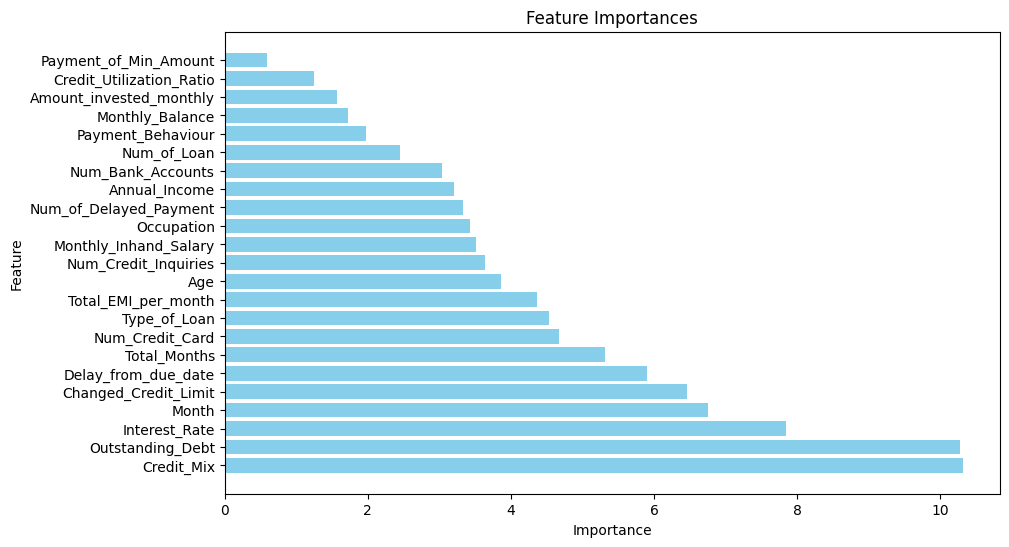

In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [ ]:
# Define threshold for feature selection
threshold = 3  # Importance threshold

# Get selected feature names with importance greater than the threshold
selected_features = [feature for feature, importance in zip(X_train.columns, feature_importances) if importance > threshold]

# Add selected features to the DataFrame
BankData_encoded['CatBoost'] = 'Not Selected'  # Initialize all values as 'Not Selected'
BankData_encoded.loc[:, selected_features] = 'Selected'  # Update selected features to 'Selected'

# Print number of selected features
print("Number of selected features with importance > 3:", len(selected_features))

# Display selected features
selected_features


Number of selected features with importance > 3: 17


['Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Total_EMI_per_month',
 'Total_Months']

 CatBoost provides a robust and efficient solution for gradient boosting tasks, especially when dealing with datasets containing categorical features.

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Selecting features and target variable
X = BankData[
['Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Total_EMI_per_month',
 'Total_Months']
             ]  # Features
y = BankData["Credit_Score"]  # Target variable

# Suppose 'Credit_Mix' is a categorical feature
credit_mix_encoder = LabelEncoder()
X['Credit_Mix'] = credit_mix_encoder.fit_transform(X['Credit_Mix'])

# Label encoding for the target variable if it contains categorical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(BankData["Credit_Score"])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-9-95a8626fd6c3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Credit_Mix'] = credit_mix_encoder.fit_transform(X['Credit_Mix'])


In [ ]:
X_test.head(2)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Total_EMI_per_month,Total_Months
2299,February,45.0,Developer,8779.0,507.595417,10.0,6.0,32.0,"Auto Loan, Payday Loan, Student Loan, Mortgage...",22.0,22.0,3.33,11.0,0,1636.23,32.406428,96.0
836,April,51.0,Architect,43581.0,3566.760833,4.0,3.0,9.0,"Auto Loan, Student Loan, and Student Loan",14.0,3.0,8.56,2.0,1,900.83,103.033078,280.0


In [ ]:
X_test.iloc[[0]]


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Total_EMI_per_month,Total_Months
2299,February,45.0,Developer,8779.0,507.595417,10.0,6.0,32.0,"Auto Loan, Payday Loan, Student Loan, Mortgage...",22.0,22.0,3.33,11.0,0,1636.23,32.406428,96.0


In [ ]:
y_test

array([1, 0, 2, ..., 2, 1, 2])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Concatenate training and testing data
X_combined = pd.concat([X_train, X_test], axis=0)

# Perform label encoding for categorical variables
label_encoder = LabelEncoder()

for col in X_combined.columns:
    if X_combined[col].dtype == 'object':
        X_combined[col] = label_encoder.fit_transform(X_combined[col])

# Split the combined data back into training and testing sets
X_encoded = X_combined.iloc[:len(X_train), :]
X_test_encoded = X_combined.iloc[len(X_train):, :]

# Create CatBoost Classifier model
catboost_clf = CatBoostClassifier( random_state=42)  # You can adjust the parameters as needed

# Fit the model on the training data
catboost_clf.fit(X_encoded, y_train)

# Predict on the testing data
y_pred = catboost_clf.predict(X_test_encoded)


Learning rate set to 0.097141
0:	learn: 1.0302448	total: 37.2ms	remaining: 37.2s
1:	learn: 0.9770519	total: 70.6ms	remaining: 35.2s
2:	learn: 0.9341847	total: 106ms	remaining: 35.2s
3:	learn: 0.8977606	total: 142ms	remaining: 35.3s
4:	learn: 0.8690720	total: 178ms	remaining: 35.5s
5:	learn: 0.8436147	total: 218ms	remaining: 36.1s
6:	learn: 0.8231695	total: 251ms	remaining: 35.5s
7:	learn: 0.8047838	total: 284ms	remaining: 35.3s
8:	learn: 0.7890784	total: 324ms	remaining: 35.7s
9:	learn: 0.7758497	total: 356ms	remaining: 35.2s
10:	learn: 0.7649563	total: 393ms	remaining: 35.3s
11:	learn: 0.7547960	total: 436ms	remaining: 35.9s
12:	learn: 0.7454303	total: 474ms	remaining: 36s
13:	learn: 0.7373353	total: 510ms	remaining: 35.9s
14:	learn: 0.7304013	total: 544ms	remaining: 35.7s
15:	learn: 0.7240923	total: 594ms	remaining: 36.6s
16:	learn: 0.7190396	total: 636ms	remaining: 36.8s
17:	learn: 0.7139531	total: 673ms	remaining: 36.7s
18:	learn: 0.7090975	total: 710ms	remaining: 36.6s
19:	learn: 

# 9. Evaluate the model with the appropriate measure and save it as a .pkl file


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7702838302752294


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.72      0.70      2453
           1       0.77      0.76      0.76      4107
           2       0.80      0.79      0.80      7392

    accuracy                           0.77     13952
   macro avg       0.75      0.76      0.75     13952
weighted avg       0.77      0.77      0.77     13952



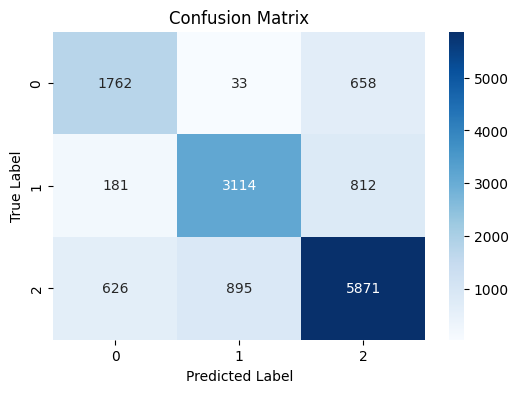

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
from joblib import dump

# Save the trained model as a .pkl file
model_filename = "catboost_classifier.pkl"
dump(catboost_clf, model_filename)
print(f"CatBoost classifier saved as {model_filename}")



CatBoost classifier saved as catboost_classifier.pkl


# 10. Write a function to be called for predicting new coming rows.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def predict_new_data(new_data, model_path):
    """
    Predict labels for new data using a pre-trained CatBoostClassifier model.

    Args:
    - new_data (DataFrame): DataFrame containing new data to be predicted.
    - model_path (str): File path to the pre-trained CatBoostClassifier model.

    Returns:
    - predicted_labels (array-like): Predicted labels for the new data.
    """

    # Load the pre-trained CatBoostClassifier model
    model = joblib.load(model_path)

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Apply label encoding to categorical columns
    for col in new_data.columns:
        if new_data[col].dtype == 'object':
            new_data[col] = label_encoder.fit_transform(new_data[col])

    # Make predictions on the new data
    predicted_labels = model.predict(new_data)

    return predicted_labels


In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
import joblib
from sklearn.preprocessing import LabelEncoder

# Load your trained CatBoostClassifier model
model_path = '/content/catboost_classifier.pkl'
model = joblib.load(model_path)  # Load the model from the file

# Load the new data into a DataFrame
new_data = pd.DataFrame({
    'Month': ['April'],
    'Age': [51.0],
    'Occupation': ['Architect'],
    'Annual_Income': [43581.0],
    'Monthly_Inhand_Salary': [3566.760833],
    'Num_Bank_Accounts': [4.0],
    'Num_Credit_Card': [3.0],
    'Interest_Rate': [9.0],
    'Type_of_Loan': ['Auto Loan, Student Loan, and Student Loan'],
    'Delay_from_due_date': [14.0],
    'Num_of_Delayed_Payment': [3.0],
    'Changed_Credit_Limit': [8.56],
    'Num_Credit_Inquiries': [2.0],
    'Credit_Mix': [1],
    'Outstanding_Debt': [900],
    'Total_EMI_per_month': [103],
    'Total_Months': [280]
})

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode object-type columns
for col in new_data.select_dtypes(include=['object']).columns:
    new_data[col] = label_encoder.fit_transform(new_data[col])

# Make predictions on the new data
predicted_labels = model.predict(new_data)

# Display the predicted labels
print("Predicted labels for the new data:")
print(predicted_labels)


Predicted labels for the new data:
[[0]]


# Bonus



###• Develop web application with to main functionalities (train, predict)


###• In python develop flask api. One for train and one for test


###• If you choose train from web application, train api will be called to apply the ML pipeline and save the model as pkl


###• In case you select predict from web application, predict api will be called to predict the new given rows.